In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
clusteringData = pd.read_csv("../ClusteringData/ClusteringDF.csv")

missingValues = clusteringData.isnull().sum()
missingValues

file_names = clusteringData["file_name"].copy()

In [6]:
clusteringData.drop(['file_name', 'mean_post_peak_magnitude', 'std_dev_post_peak_magnitude'], axis = 1, inplace= True)

clusteringData.isnull().sum()

std_dev                         0
mean_time_diff                  0
median_time_diff                0
max_peak                        0
median_peak                     0
std_peak                        0
avg_peaks_per_second            0
sum_peak_magnitude              0
percent_time_above_threshold    0
dtype: int64

In [7]:
clusteringData.dtypes

std_dev                         float64
mean_time_diff                  float64
median_time_diff                float64
max_peak                        float64
median_peak                     float64
std_peak                        float64
avg_peaks_per_second            float64
sum_peak_magnitude              float64
percent_time_above_threshold    float64
dtype: object

In [8]:
# Standardize
scaler = StandardScaler()
scaledData = scaler.fit_transform(clusteringData)

In [9]:
# Apply PCA
pca = PCA(n_components=6)  # Reduce to 2 components for 2D visualization
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])

variance_ratios = pca.explained_variance_ratio_
print("Variance explained by each principal component:")
for i, ratio in enumerate(variance_ratios, start=1):
    print(f"PC{i}: {ratio:.2%}")

Variance explained by each principal component:
PC1: 35.15%
PC2: 25.61%
PC3: 15.82%
PC4: 8.74%
PC5: 7.82%
PC6: 4.22%


In [10]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters (How many do we want??)
clusters = kmeans.fit_predict(pcaData)
pcaDF['Cluster'] = clusters

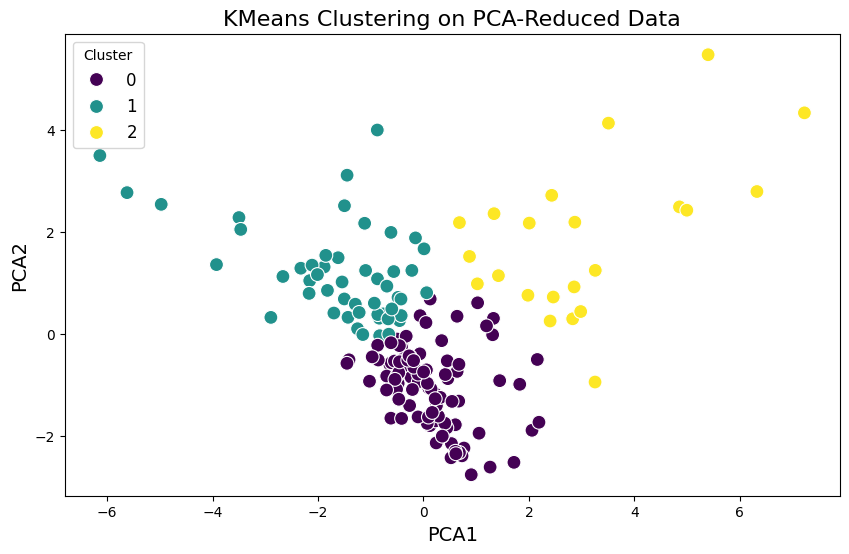

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=pcaDF,
    palette='viridis',
    s=100
)
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()

In [12]:
# Investigating PCA Components
loading_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=clusteringData.columns
)

print("PCA Loadings:")
print(loading_matrix)

loading_matrix['PC5']

PCA Loadings:
                                   PC1       PC2       PC3       PC4  \
std_dev                       0.332013  0.302188 -0.022628 -0.529226   
mean_time_diff                0.424831  0.361379  0.101733  0.089338   
median_time_diff              0.414477  0.364748  0.102283  0.124802   
max_peak                     -0.371917  0.427190 -0.215474  0.021970   
median_peak                  -0.191580  0.361194 -0.389570  0.603739   
std_peak                     -0.210652  0.422958 -0.305517 -0.479317   
avg_peaks_per_second          0.007918  0.355843  0.564981  0.240328   
sum_peak_magnitude           -0.372889  0.126469  0.568207 -0.058843   
percent_time_above_threshold -0.423068  0.102867  0.212320 -0.201032   

                                   PC5       PC6  
std_dev                      -0.290899  0.646630  
mean_time_diff                0.369872 -0.124898  
median_time_diff              0.395456 -0.141348  
max_peak                      0.064206 -0.035261  
median_pea

std_dev                        -0.290899
mean_time_diff                  0.369872
median_time_diff                0.395456
max_peak                        0.064206
median_peak                    -0.111361
std_peak                       -0.139312
avg_peaks_per_second           -0.502106
sum_peak_magnitude              0.007372
percent_time_above_threshold    0.578005
Name: PC5, dtype: float64

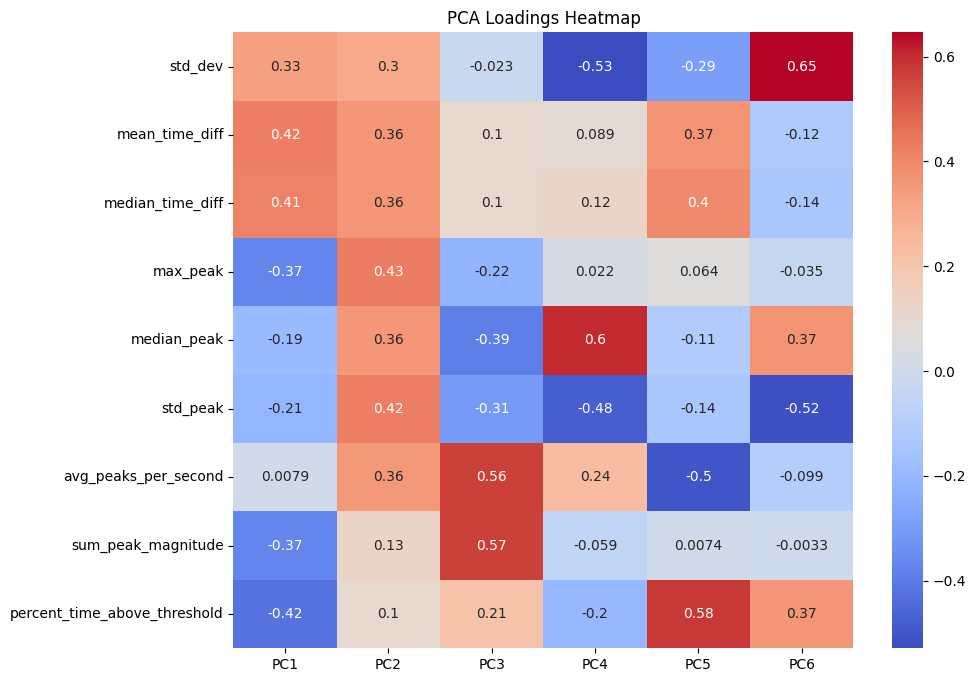

In [13]:
# Visualizing PCA Components
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm')
plt.title("PCA Loadings Heatmap")
plt.show()


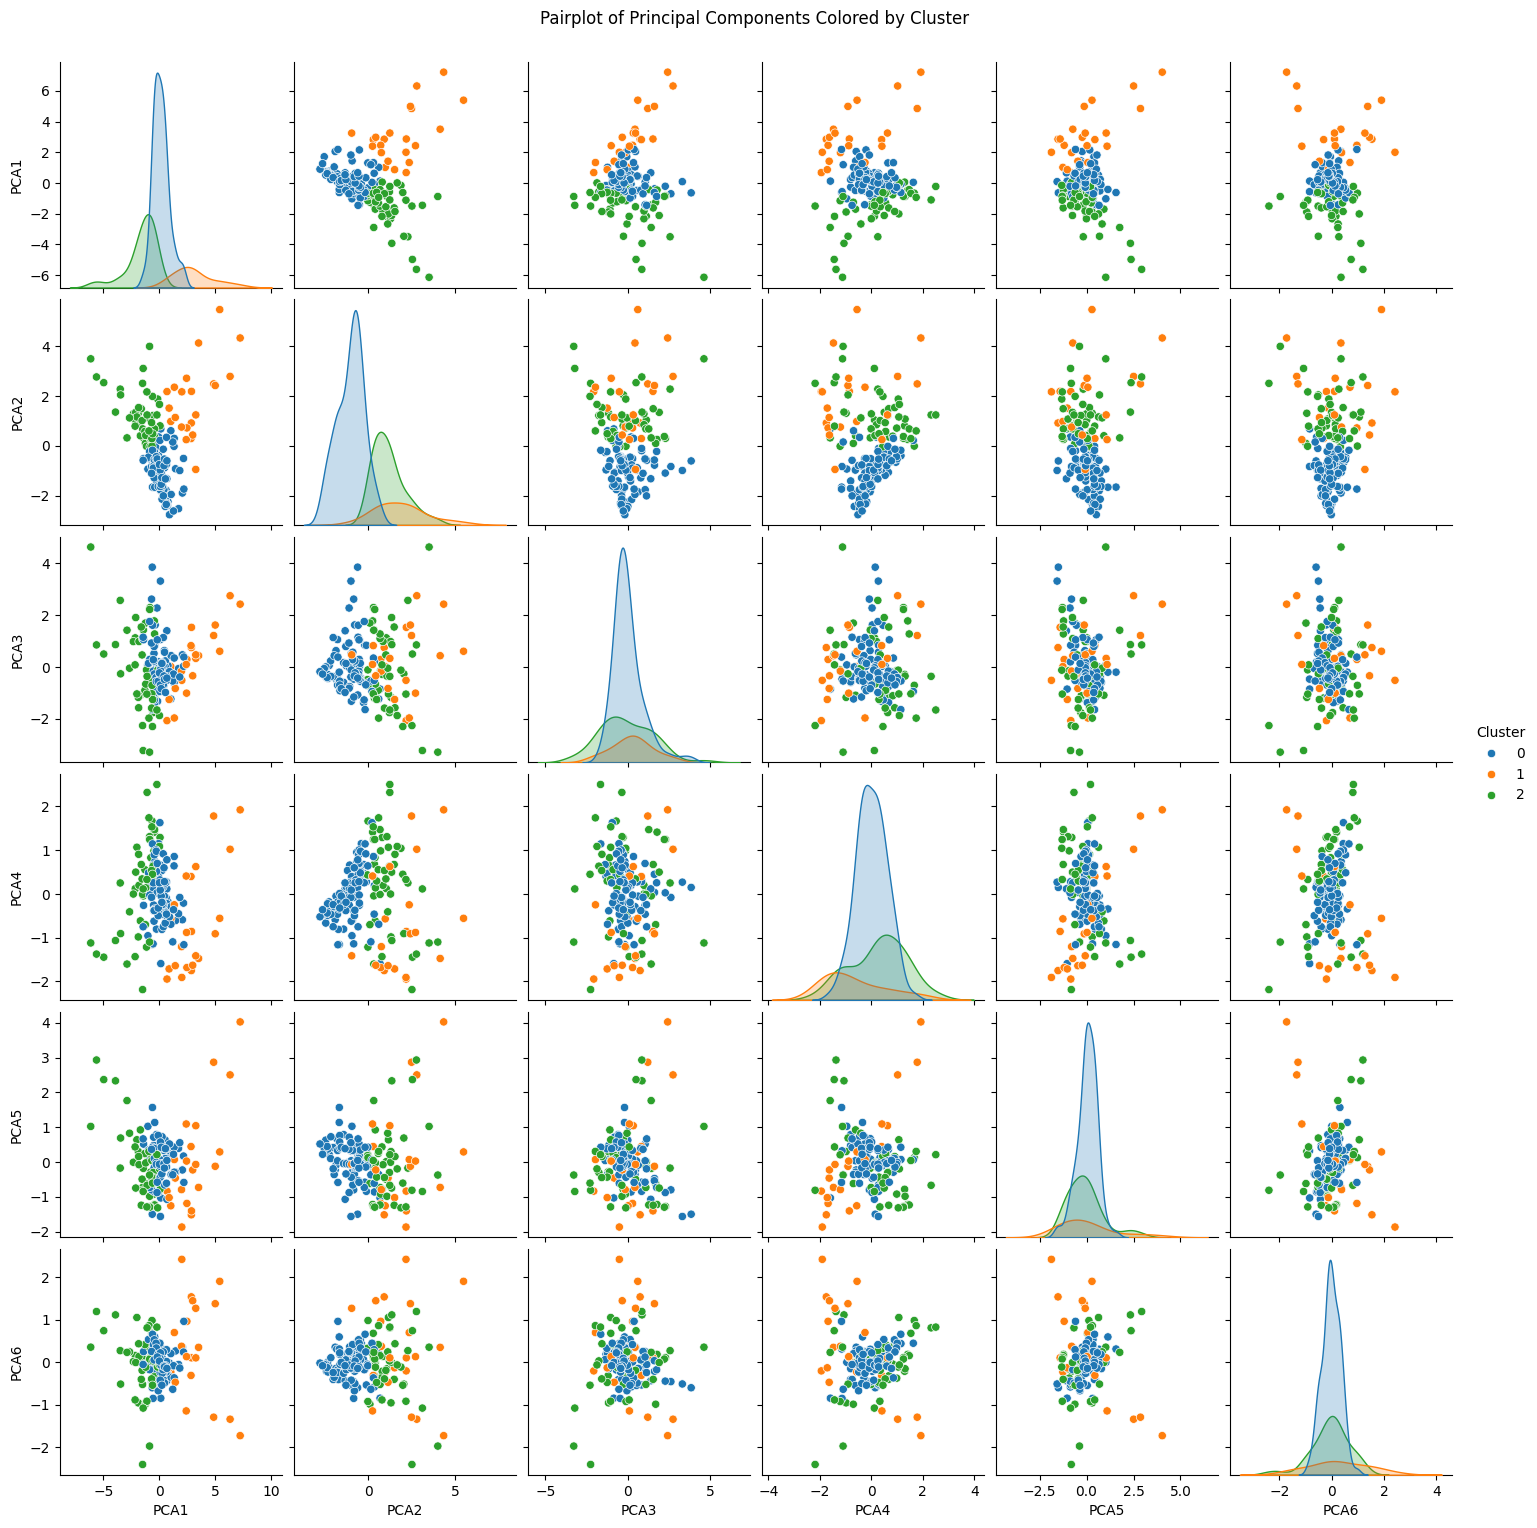

In [14]:
k = 6  # Adjust based on your dataset
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(pcaDF)

# Add cluster labels to the DataFrame
pcaDF['Cluster'] = labels

# Create a pairplot of the first few PCA components, colored by cluster
sns.pairplot(pcaDF, hue='Cluster', palette="tab10", diag_kind='kde')

# Add title
plt.suptitle("Pairplot of Principal Components Colored by Cluster", y=1.02)
plt.show()

In [25]:
# save to csv file
pcaDF["file_name"] = file_names.str[64:]
pcaDF.to_csv("pcaDF.csv", index=False)